In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os
os.chdir('../')

In [5]:
data = pd.read_csv(
    './data/All_browse_data_без_погружения_19971021_20230107_с_пропусками.csv',
    encoding='cp1251', na_values='N')

data.head()

,year,month,day,hour from,hour to,doySin,hourSin,doyCos,hourCos,Dst,...,lg(E>0.8 MeV),E>2 MeV,lg(E>2 MeV),E>2 MeV G16,lg(E>2 MeV) G16,CH_rca (193),CH_rca (211),SW_spd_frcst (193),SW_spd_frcst (211),Unnamed: 62
0,1997,10,21,0,1,-0.505271,0.991445,-0.862961,-0.130526,-14,...,NaN,5.191667,0.715307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,10,21,1,2,-0.505889,0.923880,-0.862598,-0.382683,-15,...,NaN,2.732364,0.436539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,10,21,2,3,-0.506508,0.793353,-0.862235,-0.608761,-15,...,NaN,3.341625,0.523958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997,10,21,3,4,-0.507126,0.608761,-0.861872,-0.793353,-13,...,NaN,2.082444,0.318573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997,10,21,4,5,-0.507744,0.382683,-0.861508,-0.923880,-13,...,NaN,0.937637,-0.027965,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from scripts.pipeline.preprocess import preprocess_3h

In [8]:
data = preprocess_3h(data)

In [11]:
data.category.value_counts()

0    42555
1    22813
2     8312
Name: category, dtype: int64

<AxesSubplot: xlabel='dttm'>

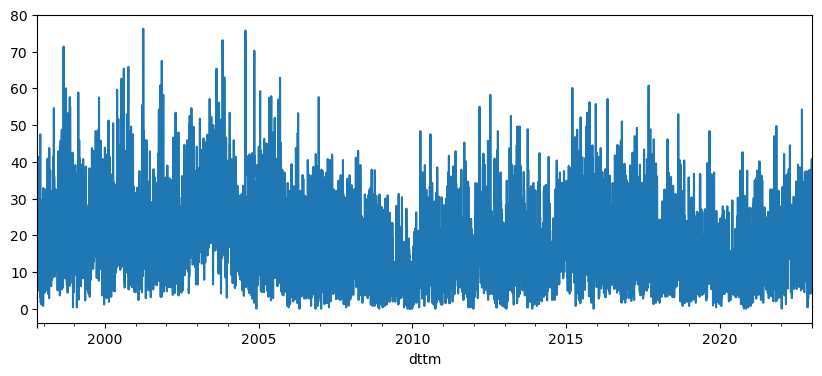

In [15]:
(
    data.groupby(pd.Grouper(key="dttm", freq="d"))
    ["Kp*10"].mean()
    .sort_index()
    .plot(figsize=(10, 4))
)

<AxesSubplot: xlabel='dttm'>

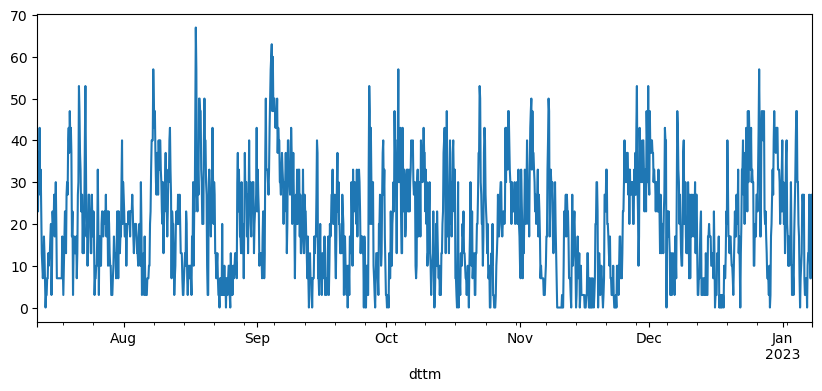

In [20]:
(
    data
    .set_index("dttm")["Kp*10"]
    .sort_index()
    .last('180d')
    .plot(figsize=(10, 4))
)

<AxesSubplot: xlabel='dttm'>

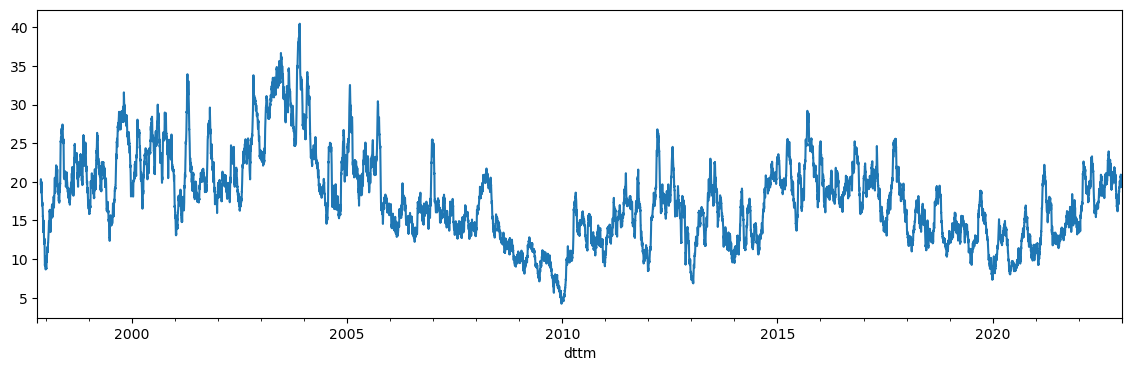

In [23]:
(
    data
    .set_index("dttm")["Kp*10"]
    .sort_index()
    .rolling(7 * 4 * 24 // 3)
    .mean()
    .plot(figsize=(14, 4))
)